In [17]:
import cv2
import numpy as np
import os
import tensorflow as tf
from google.colab import drive
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:

EPOCHS = 10 # can edit min is 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 13
TEST_SIZE = 0.5 # can edit 0.0 - 0.9


In [19]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [20]:
def load_data():
    """
    Loads features and labels from the data folder.

    Returns:
        features: a numpy array of shape (num_samples, IMG_WIDTH * IMG_HEIGHT)
        labels: a numpy array of shape (num_samples,)
    """
    features = []
    labels = []
    for folder in os.listdir("/content/drive/MyDrive/data"):
        for image_path in os.listdir(os.path.join("/content/drive/MyDrive/data", folder)):
            # Read the image and resize it
            image = cv2.imread(os.path.join("/content/drive/MyDrive/data", folder, image_path), cv2.IMREAD_GRAYSCALE)
            img=~image
            if img is not None:
                ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
                ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
                cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
                w=int(IMG_WIDTH)
                h=int(IMG_WIDTH)
                maxi=0
                for c in cnt:
                    x,y,w,h=cv2.boundingRect(c)
                    maxi=max(w*h,maxi)
                    if maxi==w*h:
                        x_max=x
                        y_max=y
                        w_max=w
                        h_max=h
                im_crop= thresh[y_max:y_max+h_max, x_max:x_max+w_max]
                im_resize = cv2.resize(im_crop,(IMG_WIDTH,IMG_WIDTH))

            # Flatten the image into a 1D array
            features.append(im_resize.flatten())

            # Add the label for this image
            if folder == '+':
                labels.append(int(10))
            elif folder == '-':
                labels.append(int(11))
            elif folder == 'multiply':
                labels.append(int(12))
            else:
                labels.append(int(folder))

    return np.array(features), np.array(labels)

In [21]:
def build_model():
    """
    Builds and returns the model.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(IMG_WIDTH * IMG_HEIGHT,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model


In [22]:
def main():
    # Load features and labels
    features, labels = load_data()

    # Split data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=TEST_SIZE
    )

    # Build the model
    model = build_model()

    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=EPOCHS,
        batch_size=32,
        validation_data=(test_features, test_labels)
    )

    # plot loss and accuracy
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.show()

    # Save and download the model
    model.save("handwritten_equation_solver.h5")

Epoch 1/10
326/326 [==============================] - 3s 7ms/step - loss: 5.7463 - accuracy: 0.3388 - val_loss: 1.9268 - val_accuracy: 0.3895
Epoch 2/10
326/326 [==============================] - 2s 6ms/step - loss: 1.4951 - accuracy: 0.5373 - val_loss: 1.5248 - val_accuracy: 0.5963
Epoch 3/10
326/326 [==============================] - 3s 8ms/step - loss: 1.0989 - accuracy: 0.6838 - val_loss: 1.2785 - val_accuracy: 0.6901
Epoch 4/10
326/326 [==============================] - 3s 10ms/step - loss: 0.8194 - accuracy: 0.7646 - val_loss: 1.0505 - val_accuracy: 0.7626
Epoch 5/10
326/326 [==============================] - 2s 7ms/step - loss: 0.6606 - accuracy: 0.8132 - val_loss: 1.0123 - val_accuracy: 0.7663
Epoch 6/10
326/326 [==============================] - 2s 6ms/step - loss: 0.5495 - accuracy: 0.8468 - val_loss: 0.8338 - val_accuracy: 0.8193
Epoch 7/10
326/326 [==============================] - 2s 6ms/step - loss: 0.4032 - accuracy: 0.8765 - val_loss: 0.7805 - val_accuracy: 0.8285
Epoch

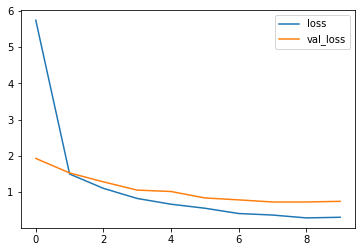

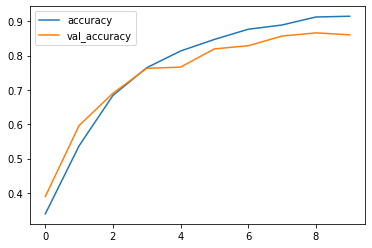

In [23]:
main()

In [24]:
from google.colab import files
files.download("/content/handwritten_equation_solver.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>